In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

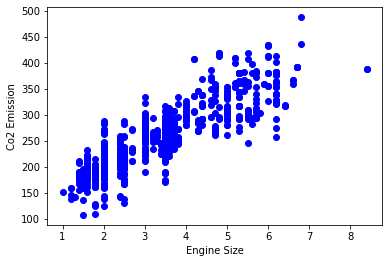

In [4]:
df = pd.read_csv("res/FuelConsumption.csv")
# selecting features and exploring the data
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
# Distributing the Data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk] 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

LinearRegression()

Text(0, 0.5, 'Emission')

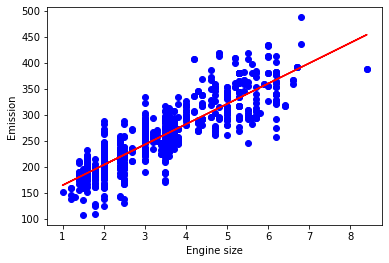

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [7]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

In [8]:
print("Mean absolute error: %.2f"% np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 21.70
Residual sum of squares (MSE): 824.82
R2-score: 0.73
